# Battle of Neighborhoods

## 1. Introduction

### 1.1 Background

New York is a major central city for diversity since many people from different cultural atmospheres have brought their families and dreams to New York City. The city has consistently seen people from around the world move to the city and call it home. It has been a center for trade and economic growth. New York is known world wide as a cultural melting pot. While other states have had immigration surges, none have compared to the diversity and sheer number of immigrants that have made their way to the City. So these number of varies cultures combined to create a great diversity for itself. Since People from all over the world tend to come up here, we can see some many of their cultural aspects Transport, Food, Clothing, and so on...

### 1.2 Problem

Restaurant is a place where people come to have food and drinks for a cost, People love to do many things and try something new or stick with their own routines, it depends on the individual and there are so many of them with different cultural and various aspects in New York city. There are so many cuisines, which is based on the style of cooking, the ingredients, dishes and techniques. For our problem lets stick with Indian cuisine.

Let's assume in this one of the world's most diverse region we want to open an Indian restaurant, so what are all the factors we have to take into account such as follows,

* Market Places
* Competition in particular location
* Aiding places that make people come to restaurants like Gym, Entertaining Public places
* Population
* Menu from competitors

And so on...
So our solution needs to be data driven for avoiding or considering low risk criteria and high success rate and thus apply our overall knowledge in the techniques and the tools gained so far in this course.

### 1.3 Interest

The main interest of the Business to be started as an Indian Cuisine restaurant would be to know about the many criteria that leads to come to a data driven conclusion for selecting the best neighborhood for opening one. But some of the criteria we are gonna be focusing on in our project is as follows,
* Best Neighborhood for opening Restaurant (Indian Cuisine) in New York.
* Area which lack Indian Restaurants.
* Places with best Indian Cuisine.
* Areas with Potential Indian Restaurants. 

## 2. Data Acquisition and Cleaning

### 2.1 Data Sources

Since we will be focusing on New York for opening our restaurant, we will be gathering the data for the same and the three main data we are gonna use are the New York Neighborhood data which we already used in the Neighborhoods in New York and the data about the cuisines in New York and the Geo spacial data of boundaries of the Neighborhoods in New York.

#### 2.1.1 Data 1:

New York Neighborhood Data which will be used to get to know about the various neighborhoods which are gonna take into consideration for our Project.

![data-1.jpg](https://raw.githubusercontent.com/rohanbollareddi/Coursera_Capstone/master/data-1.jpg)

Data source : https://cocl.us/new_york_dataset

#### 2.1.2 Data 2:

Geo-spacial data of the New York to get a better understanding of the neighborhoods in it and their corresponding locations in the Folium map would make certain things clear for the Project. This will be achieved using the acquired data and visualize the same using Choropleth maps.

![data-2.jpg](https://raw.githubusercontent.com/rohanbollareddi/Coursera_Capstone/master/data-2.jpg)

Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

#### 2.1.3 Data 3:

Finally the data going to be collected/acquired from the Foursquare API about the various restaurants in each neighborhood of New York city especially Indian cuisine, which will be used  for acquiring the information regarding same for all the venues of each neighborhood. 

Data source : [Foursquare](https://enterprise.foursquare.com/products/places)

### 2.2 Data Cleaning and approach

* Acquire the data from the various sources as mentioned below,
  * New York neighborhood data from https://cocl.us/new_york_dataset
  * Borough Boundaries data from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
  * Indian Cuisine related data from [Foursquare](https://enterprise.foursquare.com/products/places)
* Filter the data for the required data acquired from Foursqaure which is only about Indian Cuisine.
* Acquire the tips and from that get the rating of every restaurant in the neighborhood of New York.
* Visualize the findings using Matplot lib and Folium for better understanding.


## 3. Exploratory Data Analysis

### 3.1 Relationship between the neighborhood and the restaurant

Import all the required libraries which will be used from here on.

In [5]:
import pandas as pd
import numpy as np
import requests
import os

import folium # For rendering maps

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # Acquiring latitude and longitude

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

Define function to create a data set about New York from the acquired data.

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [7]:
df_ny = get_new_york_data()

In [8]:
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
df_ny.shape

(306, 4)

In [21]:
df_ny[df_ny['Neighborhood']=='Woodlawn']

,Borough,Neighborhood,Latitude,Longitude
7,Bronx,Woodlawn,40.898273,-73.867315


Initially get to know about the various boroughs and neighborhoods using a bar chart in New York.

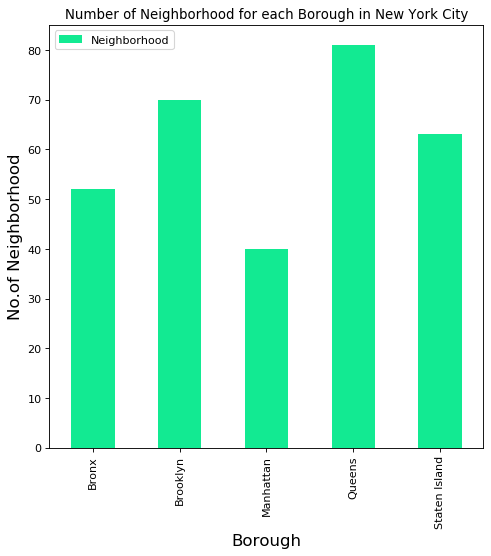

In [10]:
plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_ny.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Define function for acquiring the latitude and longitude from the provided location

In [11]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define a function to get the details of the venue by accessing the Foursquare API

In [13]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
        
    CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Get a list of each and every Indian Cuisine in the New York.

In [23]:
vns = get_venues(40.898273,-73.867315)
vns[vns['Category']=='Indian Restaurant']

,ID,Name,Category
3,4c0448d9310fc9b6bf1dc761,Curry Spot,Indian Restaurant


In [28]:
ind_res = vns[vns['Category']=='Indian Restaurant'].values.tolist()
ind_res

[['4c0448d9310fc9b6bf1dc761', 'Curry Spot', 'Indian Restaurant']]

In [33]:
len(vns[vns['Category']=='Indian Restaurant'].values.tolist()) > 0

True

In [36]:
for row in df_ny.values.tolist():
    print(row)

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.847897926

In [43]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)

print('Indian restaurants in\n---------------------')
       
for row in df_ny.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']
    if len(indian_resturants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed constructing the Indian cuisine restaurants data set')

Indian restaurants in
---------------------
Woodlawn, Bronx : 1
Parkchester, Bronx : 1
Spuyten Duyvil, Bronx : 1
Concourse, Bronx : 1
Unionport, Bronx : 1
Bay Ridge, Brooklyn : 1
Brighton Beach, Brooklyn : 1
Flatbush, Brooklyn : 2
East Flatbush, Brooklyn : 1
Kensington, Brooklyn : 2
Gowanus, Brooklyn : 1
Fort Greene, Brooklyn : 1
Clinton Hill, Brooklyn : 1
Prospect Lefferts Gardens, Brooklyn : 1
Ocean Hill, Brooklyn : 2
Prospect Park South, Brooklyn : 3
North Side, Brooklyn : 1
South Side, Brooklyn : 1
Washington Heights, Manhattan : 1
Hamilton Heights, Manhattan : 2
Manhattanville, Manhattan : 2
Central Harlem, Manhattan : 2
East Harlem, Manhattan : 1
Yorkville, Manhattan : 1
Roosevelt Island, Manhattan : 1
Upper West Side, Manhattan : 3
Midtown, Manhattan : 1
Murray Hill, Manhattan : 1
Greenwich Village, Manhattan : 1
Tribeca, Manhattan : 1
West Village, Manhattan : 2
Manhattan Valley, Manhattan : 5
Morningside Heights, Manhattan : 2
Gramercy, Manhattan : 3
Financial District, Manhat

In [44]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [45]:
indian_rest_ny.shape

(153, 4)

Using a bar chart visualize the number of restaurants which serves Indian cuisine for each and every borough in New York city.

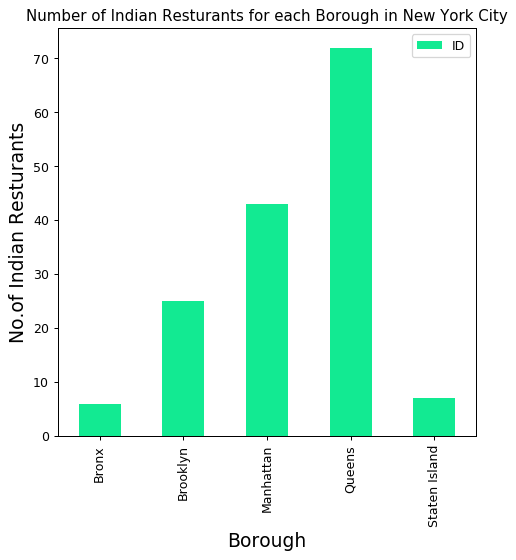

In [46]:
plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Do visualize the same for Top 15 neighborhoods based on the number of Indian cuisine restaurants in New York city.

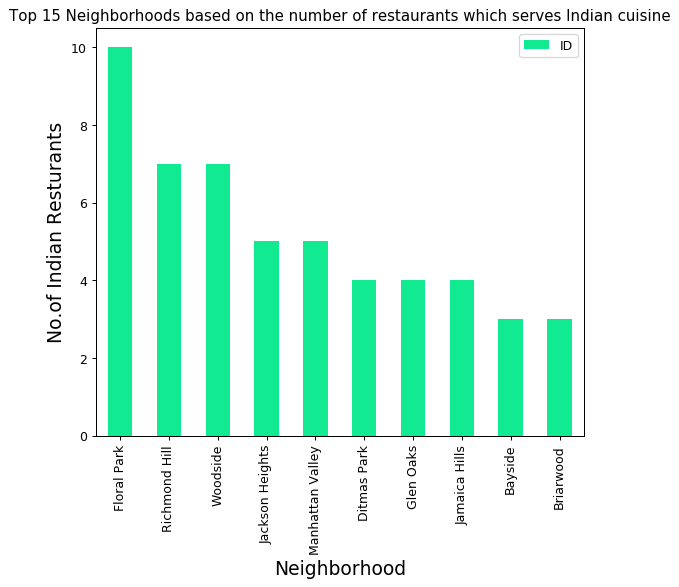

In [47]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 15 Neighborhoods based on the number of restaurants which serves Indian cuisine')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

Seems that Floral Park has the highest number of Indian restaurant in New York city.

In [48]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
100,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
101,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
102,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
103,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
104,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
105,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
106,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
107,Queens,Floral Park,571af96a498e9e392d8d3786,Namaste Authenic Indian Cuisine
108,Queens,Floral Park,55d68c1b498ecf05fa196fe1,Namaste Restaurant and Cafe
109,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


Acquire the detail about all the restaurants from the Foursquare API

In [54]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.9    11
( 1 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.1     2
( 2 / 153 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     5.8     9
( 3 / 153 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     7.1     3
( 4 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.1     2
( 5 / 153 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b5a4dc8f964a520a2bb28e3  Taj Mahal     38     8.2    26
( 6 / 153 ) processed
                         ID          Name  Likes

Data set created based on the venue details acquired from Foursquare

In [58]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.9,11
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.1,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.8,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,7.1,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.1,2


In [59]:
indian_rest_stats_ny.shape

(153, 7)

In [60]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null object
Rating          153 non-null float64
Tips            153 non-null object
dtypes: float64(1), object(6)
memory usage: 8.5+ KB


In [61]:
convert_types = { 'Likes': float, 'Tips': float }
indian_rest_stats_ny = indian_rest_stats_ny.astype(convert_types)
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null float64
Rating          153 non-null float64
Tips            153 non-null float64
dtypes: float64(3), object(4)
memory usage: 8.5+ KB


**Restaurant with most tips**

In [71]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                836
Rating                               8.7
Tips                                 259
Name: 36, dtype: object

**Highly rated Restaurant**

In [62]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              5b5a2c9e66f3cd002ca0aab5
Name                  The Drunken Munkey
Likes                                 25
Rating                                 9
Tips                                   3
Name: 38, dtype: object

**Most Liked Restaurant**

In [63]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                836
Rating                               8.7
Tips                                 259
Name: 36, dtype: object

Create a data set with the average rating of all the restaurants in the particular neighborhood of New York city

In [64]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

***List of Top 10 neighborhoods which are in their order of average rating of Indian cuisine restaurants***

In [65]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
0,Astoria,9.0
70,Tribeca,9.0
5,Blissville,9.0
11,Civic Center,9.0
30,Greenwich Village,9.0
76,West Village,8.9
44,Midtown South,8.7
43,Midtown,8.7
28,Gramercy,8.7
25,Fort Greene,8.6


***Boroughs sorted with high average rating of Indian cuisine restaurants in New York city***

In [66]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [67]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.223256
1,Brooklyn,7.384000
0,Bronx,6.683333
3,Queens,6.306944
4,Staten Island,4.514286


Bar chart visualizing the restaurants with average rating based on Boroughs

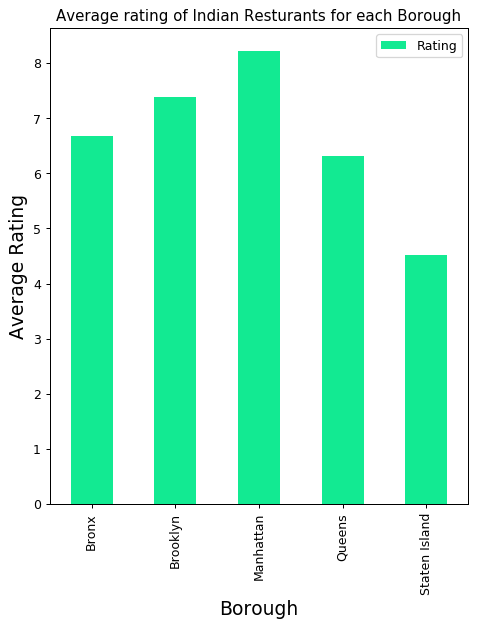

In [68]:
plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

List of neighborhoods with average rating greater than or equal to 9 for Indian cuisine

In [69]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [70]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,9.0
5,Blissville,9.0
11,Civic Center,9.0
30,Greenwich Village,9.0
70,Tribeca,9.0


In [71]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_ny, on='Neighborhood')

In [72]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [73]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,9.0
1,Queens,Blissville,40.737251,-73.932442,9.0
2,Manhattan,Civic Center,40.715229,-74.005415,9.0
3,Manhattan,Greenwich Village,40.726933,-73.999914,9.0
4,Manhattan,Tribeca,40.721522,-74.010683,9.0


Visualize

In [87]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [88]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [89]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

![vis-5.jpg](https://raw.githubusercontent.com/rohanbollareddi/Coursera_Capstone/master/vis-5.JPG)

Create a choropleth map to visualize the borough based on the average rating for better understanding.

In [ ]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
ny_geo = r'geo-boundaries.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('rated-map.html')

![vis-6.jpg](https://raw.githubusercontent.com/rohanbollareddi/Coursera_Capstone/master/vis-6.jpg)

## 4. Conclusion

Based on the Data Analysis and Visualization using Folium and Matplotlib we have rendered various bar charts and two maps from which we can come to a better understanding of the interests we had earlier to be discovered which are specified as follows.

* Best Neighborhood for opening Restaurant (Indian Cuisine) in New York.
  * Astoria(Queens), Blissville(Queens), Civic Center(Manhattan) are some of the best neighborhoods for indian cuisine.
* Area which lack Indian Restaurants.
  * Staten Island ranks last in average rating of Indian Resturants.
* Places with best Indian Cuisine. 
  * Manhattan is the best place to stay if you prefer Indian Cuisine.
* Areas with Potential Indian Restaurants. 
  * Manhattan have potential Indian Resturant Market